# Vehicle Complaints 

In [264]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Path to complaints dataset

In [265]:
complaints_dataset = '../Processed_Data/API/Complaints.pkl'

## Load Complaints Data

In [266]:
df_complaints = pd.read_pickle(complaints_dataset)
print(df_complaints.shape)
df_complaints.head()

(750742, 11)


,manufacturer,productMake,productModel,productYear,type,components,crash,dateComplaintFiled,fire,numberOfDeaths,numberOfInjuries
0,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"STRUCTURE,ENGINE",False,2019-10-30,False,0,0
1,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"POWER TRAIN,ELECTRICAL SYSTEM,AIR BAGS",False,2019-04-14,False,0,0
2,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,EXTERIOR LIGHTING,False,2018-09-02,False,0,0
3,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"SUSPENSION,AIR BAGS",False,2017-08-16,False,0,1
4,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,SEATS,False,2017-02-15,False,0,0


## Detect the new energy data

In [267]:
NEV_Symbol = ['HYBRID','ELEC','HEV','HV','EV','ENERGI','ECO','PLUG-IN']
pattern = '|'.join(NEV_Symbol)
pattern

'HYBRID|ELEC|HEV|HV|EV|ENERGI|ECO|PLUG-IN'

In [268]:
# Determine whether New Energy vehicle or Traditional vehicle, add new column called fuel_type.
df_complaints['fuel_type'] = df_complaints.productModel.str.contains(pattern)
mapping = {False: 'Traditional', True:'New energy'}
df_complaints.replace( {'fuel_type': mapping}, inplace=True )
df_complaints.head()

,manufacturer,productMake,productModel,productYear,type,components,crash,dateComplaintFiled,fire,numberOfDeaths,numberOfInjuries,fuel_type
0,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"STRUCTURE,ENGINE",False,2019-10-30,False,0,0,Traditional
1,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"POWER TRAIN,ELECTRICAL SYSTEM,AIR BAGS",False,2019-04-14,False,0,0,Traditional
2,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,EXTERIOR LIGHTING,False,2018-09-02,False,0,0,Traditional
3,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,"SUSPENSION,AIR BAGS",False,2017-08-16,False,0,1,Traditional
4,Mazda Motor Corp.,MAZDA,MAZDASPEED3,2010,Vehicle,SEATS,False,2017-02-15,False,0,0,Traditional


In [269]:
df_complaints.groupby('fuel_type').size()

fuel_type
New energy       6270
Traditional    744472
dtype: int64

# Brand
## Complaints count by makes

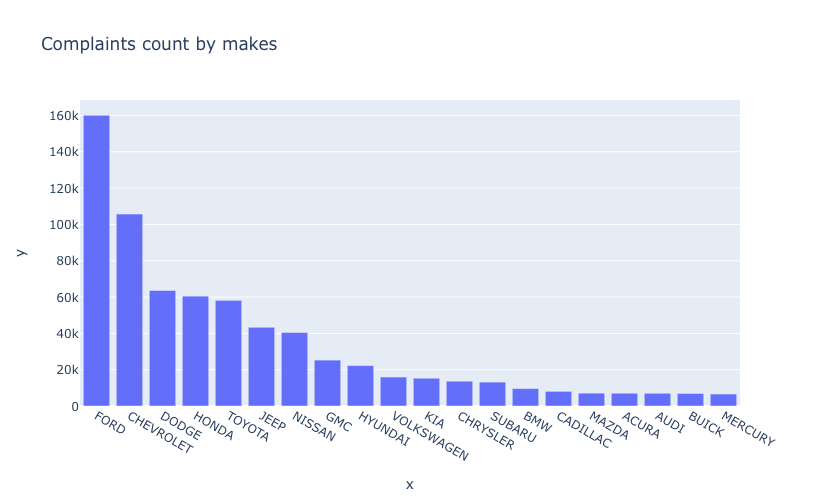

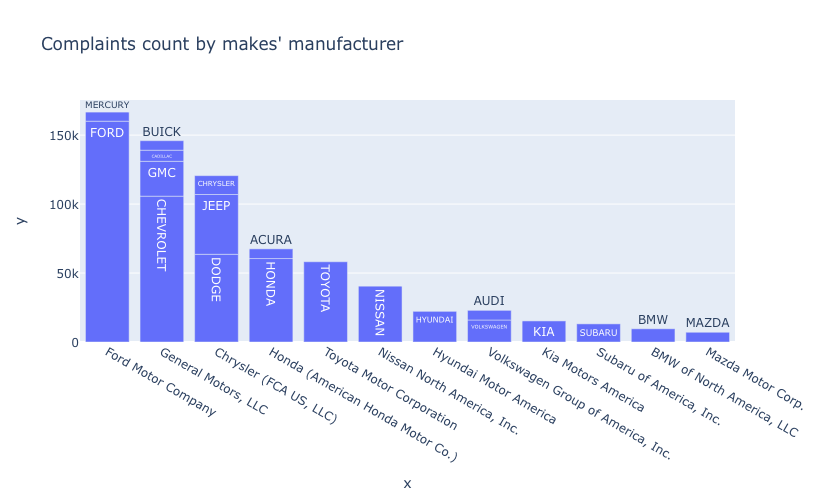

In [270]:
make_complaints_count = pd.DataFrame(df_complaints
                                     .groupby(['productMake','manufacturer'])
                                     .size()
                                     .sort_values(ascending=False)
                                     .head(20)
                                    )
make_complaints_count.reset_index(inplace=True)

fig = px.bar(d, x=make_complaints_count['productMake'], y=make_complaints_count[0],
             #pattern_shape=make_complaints_count['productMake'],
             #text_auto='.2s',
             title="Complaints count by makes",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()

fig = px.bar(d, x=make_complaints_count['manufacturer'], y=make_complaints_count[0],
             text=make_complaints_count['productMake'],
             #pattern_shape=d['productMake'],
             #text_auto='.2s',
             title="Complaints count by makes' manufacturer",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()

## Complaints count by makes with different fuel type
### New energy

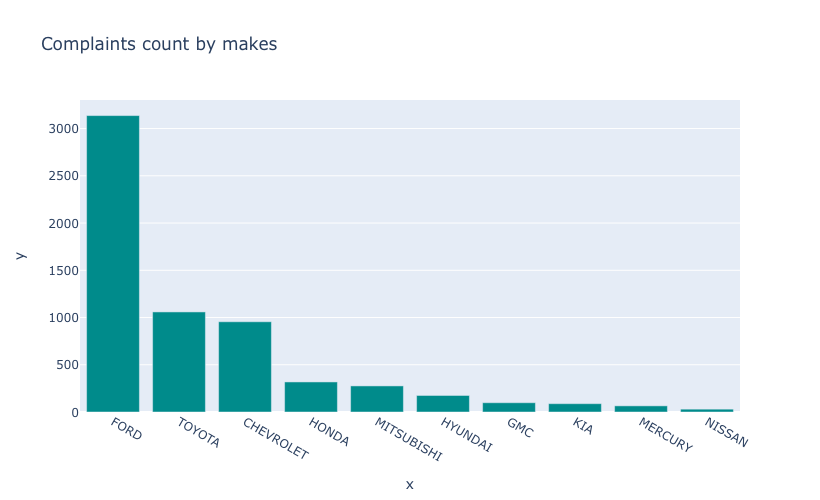

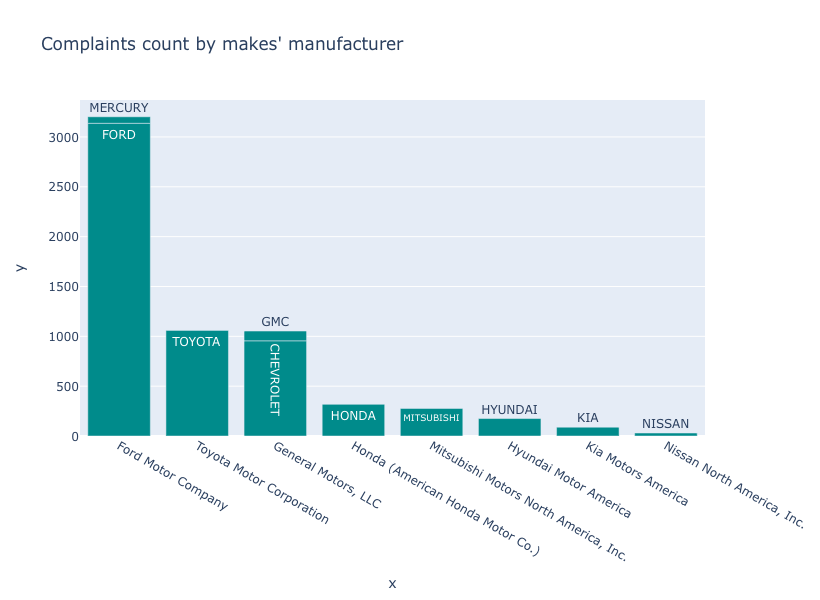

In [271]:
make_complaints_count = pd.DataFrame(df_complaints[df_complaints['fuel_type']=='New energy']
                                     .groupby(['productMake','manufacturer'])
                                     .size()
                                     .sort_values(ascending=False)
                                     .head(10)
                                    )
make_complaints_count.reset_index(inplace=True)

fig = px.bar(d, x=make_complaints_count['productMake'], y=make_complaints_count[0],
             #pattern_shape=make_complaints_count['productMake'],
             #text_auto='.2s',
             color_discrete_sequence=["darkcyan"],
             title="Complaints count by makes",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()

fig = px.bar(d, x=make_complaints_count['manufacturer'], y=make_complaints_count[0],
             text=make_complaints_count['productMake'],
             color_discrete_sequence=["darkcyan"],
             #pattern_shape=d['productMake'],
             #text_auto='.2s',
             title="Complaints count by makes' manufacturer",
             labels={"0": "Number of complaints"},
             height=600)
fig.show()

### Traditional energy

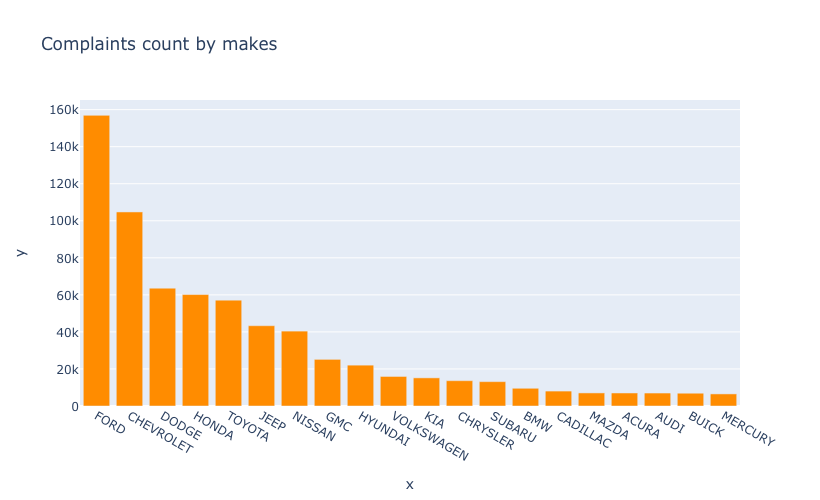

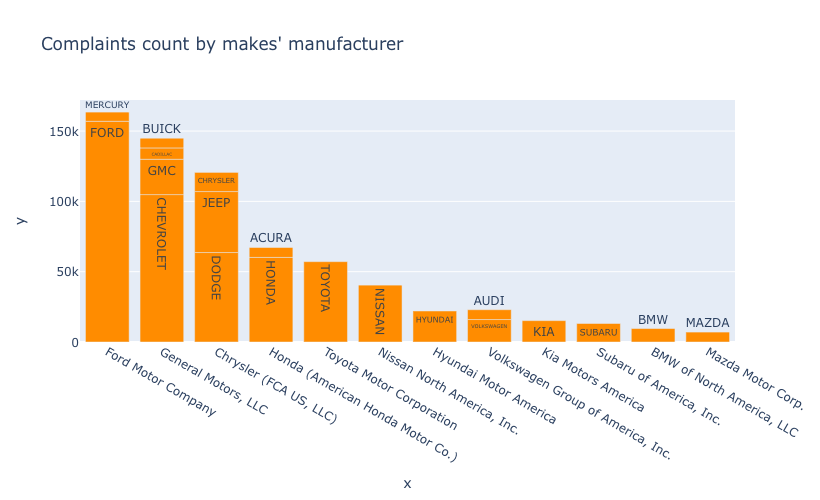

In [272]:
make_complaints_count = pd.DataFrame(df_complaints[df_complaints['fuel_type']=='Traditional']
                                     .groupby(['productMake','manufacturer'])
                                     .size()
                                     .sort_values(ascending=False)
                                     .head(20)
                                    )
make_complaints_count.reset_index(inplace=True)

fig = px.bar(d, x=make_complaints_count['productMake'], y=make_complaints_count[0],
             #pattern_shape=make_complaints_count['productMake'],
             #text_auto='.2s',
             color_discrete_sequence=["darkorange"],
             title="Complaints count by makes",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()

fig = px.bar(d, x=make_complaints_count['manufacturer'], y=make_complaints_count[0],
             text=make_complaints_count['productMake'],
             #pattern_shape=d['productMake'],
             #text_auto='.2s',
             color_discrete_sequence=["darkorange"],
             title="Complaints count by makes' manufacturer",
             labels={"0": "Number of complaints"},
             height=500)
fig.show()

# Components
## Frequency Count For Each Components

In [273]:
df_complaints['components'].value_counts().head(6)

POWER TRAIN                  62788
AIR BAGS                     61857
ELECTRICAL SYSTEM            52507
STEERING                     45944
ENGINE AND ENGINE COOLING    38660
SERVICE BRAKES,HYDRAULIC     38648
Name: components, dtype: int64

**Each complaint may have mulitiple components at same time, we need split them by comma.**

In [274]:
def split_components(series):
 return pd.Series([x for list_ in series for x in list_.split(',')])
split_components(df_complaints['components'])

0                          STRUCTURE
1                             ENGINE
2                        POWER TRAIN
3                  ELECTRICAL SYSTEM
4                           AIR BAGS
                     ...            
1038506    ENGINE AND ENGINE COOLING
1038507                     STEERING
1038508        VEHICLE SPEED CONTROL
1038509                       ENGINE
1038510                     AIR BAGS
Length: 1038511, dtype: object

**Now we can count the frequency.**

In [275]:
valueCount = split_components(df_complaints['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount.head()

ELECTRICAL SYSTEM    102386
POWER TRAIN           93831
SERVICE BRAKES        86440
AIR BAGS              82026
STEERING              68543
dtype: int64

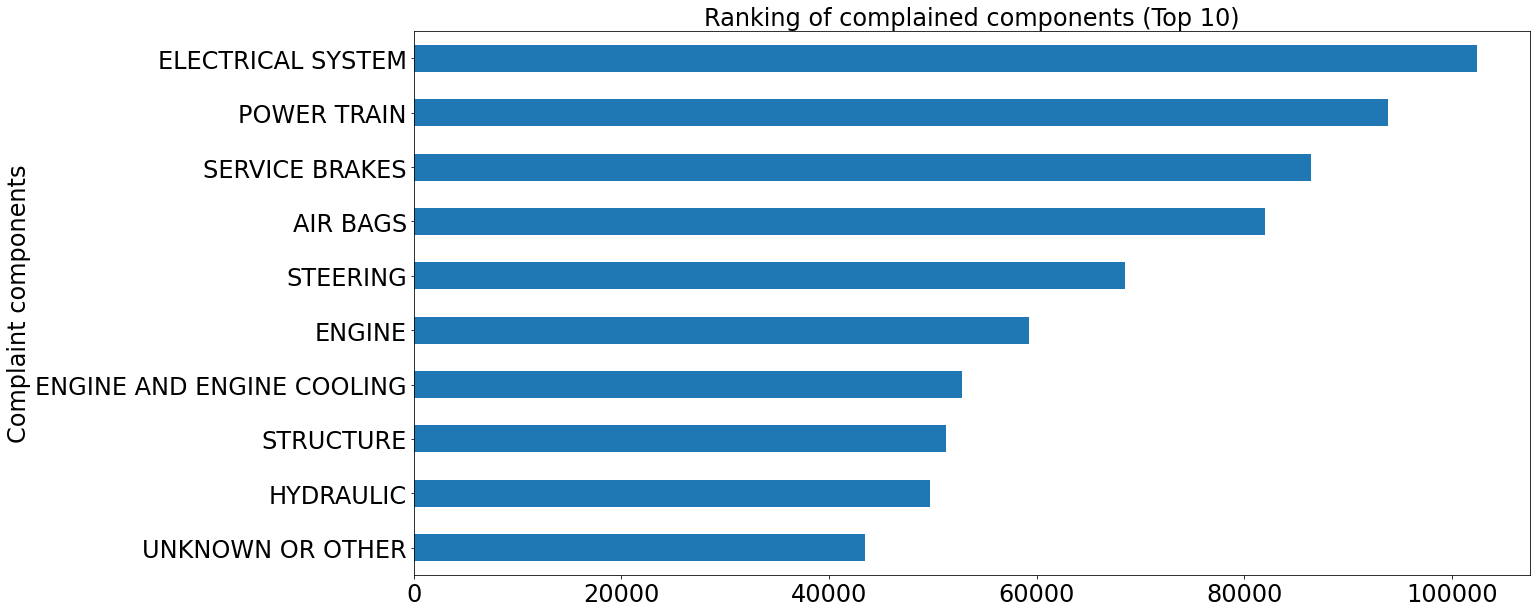

In [276]:
fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount.head(10).plot(kind="barh")
plt.title("Ranking of complained components (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_top10.png', format='png')

### Most complaint component in ***new energy vehicle***

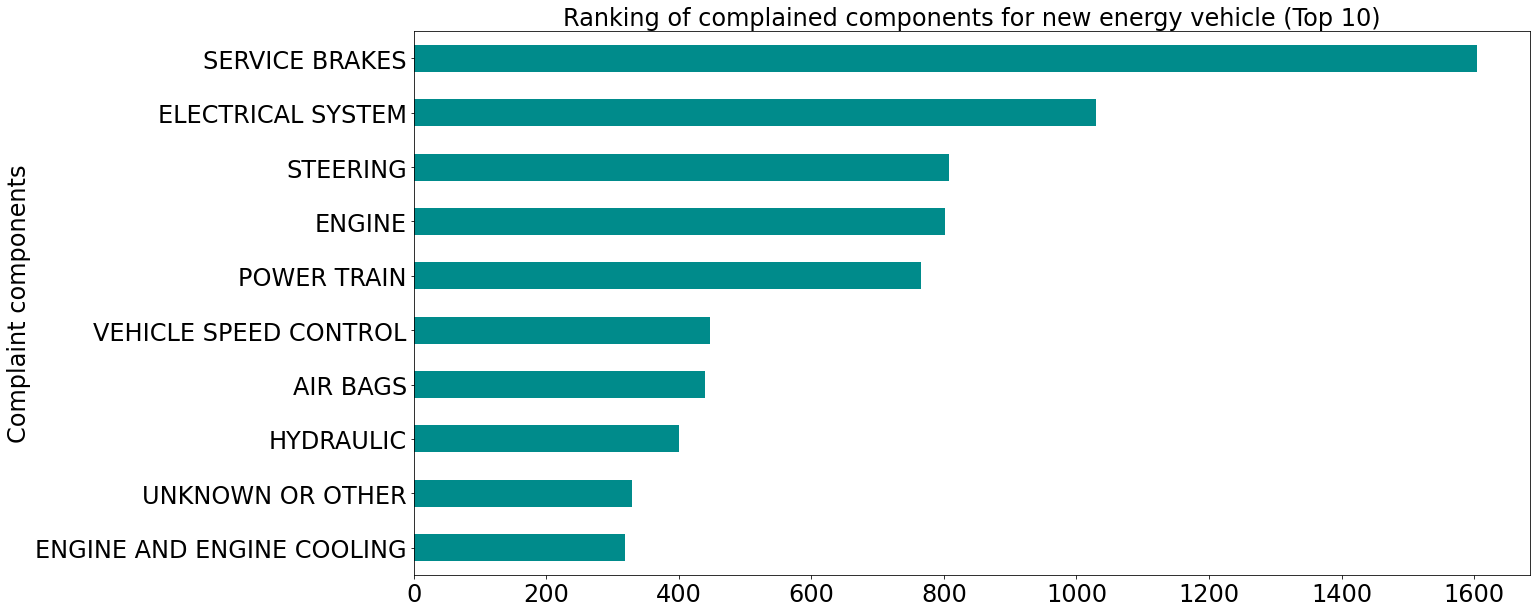

In [277]:
valueCount_with_nev = split_components(df_complaints[df_complaints['fuel_type']=='New energy']['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount_with_nev.head()

fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount_with_nev.head(10).plot(kind="barh",color="darkcyan")
plt.title("Ranking of complained components for new energy vehicle (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_for_NEV_top10.png', format='png')

### Most complaint component in ***traditional vehicle***

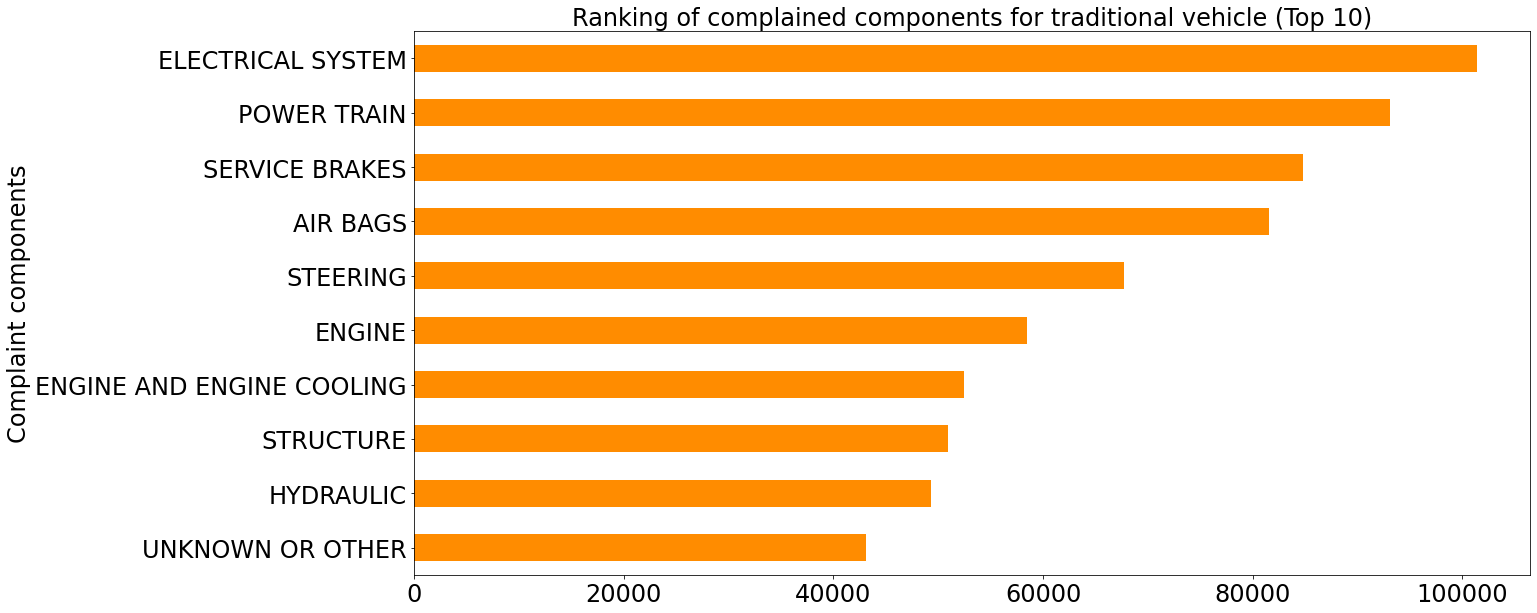

In [278]:
valueCount_with_tv = split_components(df_complaints[df_complaints['fuel_type']=='Traditional']['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
valueCount_with_tv.head()

fig = plt.figure(figsize=(20,10))
# set up the bar chart
ax = valueCount_with_tv.head(10).plot(kind="barh",color="darkorange")
plt.title("Ranking of complained components for traditional vehicle (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=24)
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_for_TraditionalVehicle_top10.png', format='png')

## Whether it was triggered by a collision
### Components count in complaints in case of crash

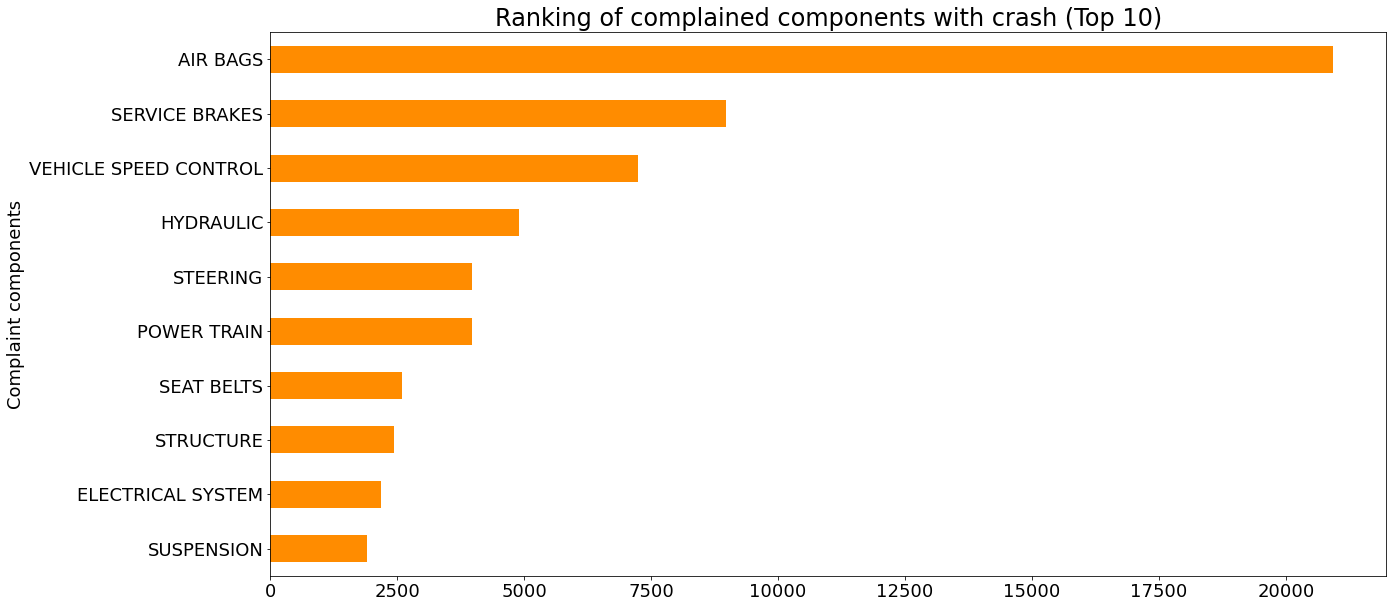

In [279]:
crash_t = df_complaints[df_complaints['crash']==True]
count_t = split_components(crash_t['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
# Draw a bar chart
plt.figure(figsize=(20,10))
# set up the bar chart
ax = count_t.head(10).plot(kind="barh",color="darkorange")
plt.title("Ranking of complained components with crash (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=18)
# increase the font sizes on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_with_crash.png', format='png')

### Components count in complaints without crash

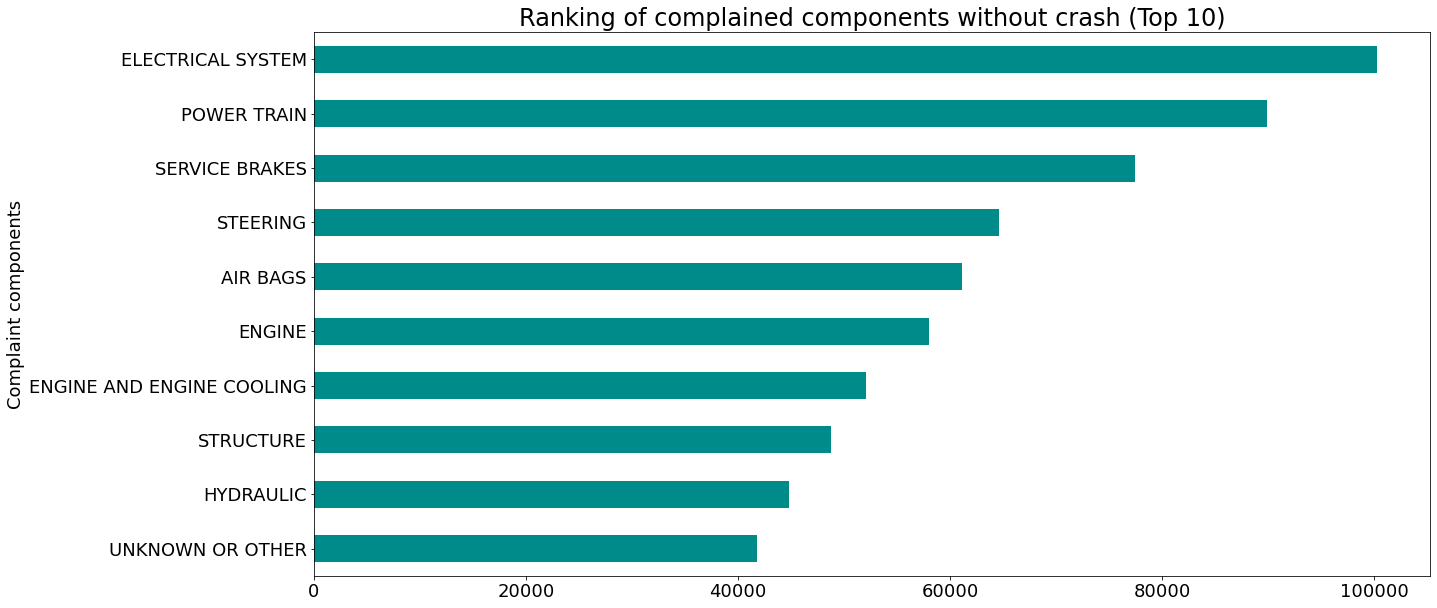

In [280]:
crash_f = df_complaints[df_complaints['crash']==False]
count_f = split_components(crash_f['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
# Draw a bar chart
plt.figure(figsize=(20,10))
# set up the bar chart
ax = count_f.head(10).plot(kind="barh",color="darkcyan")
plt.title("Ranking of complained components without crash (Top 10)", fontsize=24)
plt.ylabel("Complaint components", fontsize=18)
# increase the font sizes on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.invert_yaxis()
# Save as png image
fig.savefig('./Outputs/Complaint_components_without_crash.png', format='png')

In [281]:
crash_f = df_complaints[df_complaints['crash']==False]
crash_t = df_complaints[df_complaints['crash']==True]
count_f = split_components(crash_f['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
count_t = split_components(crash_t['components'])\
                            .value_counts()\
                            .sort_values(ascending=False)
count_f = pd.DataFrame(count_f).rename(columns={0: 'normal'})
count_t = pd.DataFrame(count_t).rename(columns={0: 'crash'})
all_ = pd.concat([count_t, count_f], axis=1)
all_.head()

,crash,normal
AIR BAGS,20928.0,61098
SERVICE BRAKES,8972.0,77468
VEHICLE SPEED CONTROL,7245.0,35192
HYDRAULIC,4906.0,44830
STEERING,3965.0,64578


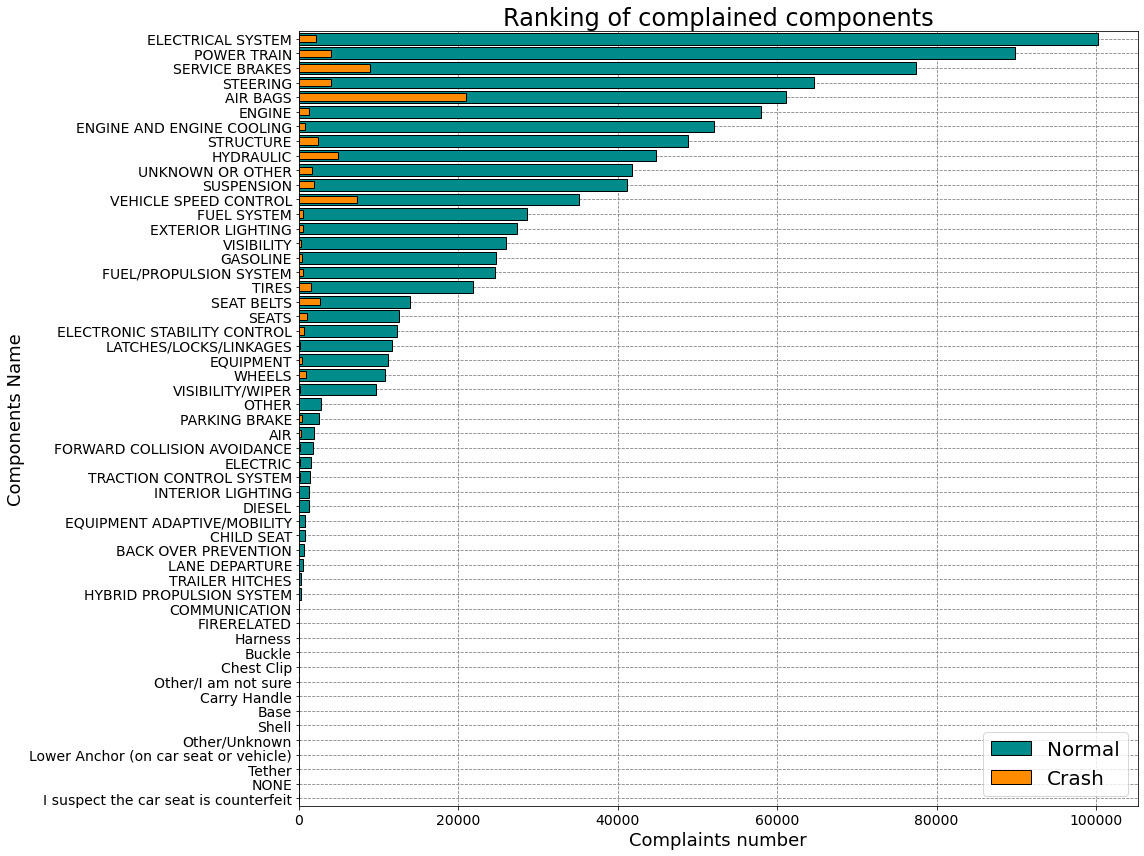

In [282]:
# Draw a bar chart
fig,ax = plt.subplots(figsize=(16,12))
all_ = all_.sort_values(by=('normal'),ascending=True)

# set up the bar chart
all_['normal'].plot(
    ax=ax,
    kind="barh",
    color="darkcyan",
    width=0.8,
    edgecolor='k',
    lw=1
)
all_['crash'].plot(
    ax=ax,
    kind="barh",
    color="darkorange",
    width=0.5,
    edgecolor='k',
    lw=1
)

# for index, value in enumerate(all_['normal']):
#     plt.text(value, index-0.25,str(value),fontsize=10)

plt.title("Ranking of complained components", fontsize=24)
plt.ylabel("Complaint components", fontsize=18)
# increase the font sizes on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(labelsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax.set_xlabel('Complaints number',fontsize=18)
ax.set_ylabel('Components Name',fontsize=18)
ax.legend(['Normal','Crash'],loc='lower right',fontsize=20)

fig.tight_layout()
# Save as png image
fig.savefig('./Outputs/Complaint_components_rank.png', format='png')

## The correlation between these components
The number of times they were damaged at the same time

Get the boolean value of all components for each complaint

In [283]:
def df_bool_with_item(list_items, unique_items):
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = list_items.apply(lambda x: item in x)
            
    return pd.DataFrame(bool_dict)

components_bool = df_bool_with_item(df_complaints['components'], valueCount.keys())
components_bool.head()

,ELECTRICAL SYSTEM,POWER TRAIN,SERVICE BRAKES,AIR BAGS,STEERING,ENGINE,ENGINE AND ENGINE COOLING,STRUCTURE,HYDRAULIC,UNKNOWN OR OTHER,...,Harness,Other/I am not sure,Base,Shell,Carry Handle,Other/Unknown,Tether,Lower Anchor (on car seat or vehicle),NONE,I suspect the car seat is counterfeit
0,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Get correlation for this dataframe

In [284]:
components_corr = components_bool.corr(method = "pearson")
components_corr.head()

,ELECTRICAL SYSTEM,POWER TRAIN,SERVICE BRAKES,AIR BAGS,STEERING,ENGINE,ENGINE AND ENGINE COOLING,STRUCTURE,HYDRAULIC,UNKNOWN OR OTHER,...,Harness,Other/I am not sure,Base,Shell,Carry Handle,Other/Unknown,Tether,Lower Anchor (on car seat or vehicle),NONE,I suspect the car seat is counterfeit
ELECTRICAL SYSTEM,1.000000,-0.072269,-0.080163,-0.072828,-0.048333,-0.022367,-0.054782,-0.060323,-0.078884,-0.011607,...,-0.001450,-0.001376,-0.001123,-0.001123,-0.001123,0.000478,-0.000794,-0.000794,-0.000459,-0.000459
POWER TRAIN,-0.072269,1.000000,-0.090960,-0.118550,-0.076405,-0.010807,-0.038221,-0.079012,-0.068814,-0.053815,...,-0.001379,-0.001309,-0.001068,-0.001068,-0.001068,-0.000975,-0.000756,-0.000756,-0.000436,-0.000436
SERVICE BRAKES,-0.080163,-0.090960,1.000000,-0.093985,-0.054436,-0.100901,-0.065730,-0.071034,0.741008,-0.062138,...,-0.001312,-0.001245,-0.001016,-0.001016,-0.001016,0.000694,-0.000719,-0.000719,-0.000415,-0.000415
AIR BAGS,-0.072828,-0.118550,-0.093985,1.000000,-0.084214,-0.127325,-0.087843,-0.053979,-0.075692,-0.049374,...,-0.001278,-0.001213,-0.000990,-0.000990,-0.000990,-0.000904,-0.000700,-0.000700,-0.000404,-0.000404
STEERING,-0.048333,-0.076405,-0.054436,-0.084214,1.000000,-0.081826,-0.062148,-0.062720,-0.054719,-0.053061,...,-0.001157,-0.001097,-0.000896,-0.000896,-0.000896,0.000974,-0.000634,-0.000634,-0.000366,-0.000366


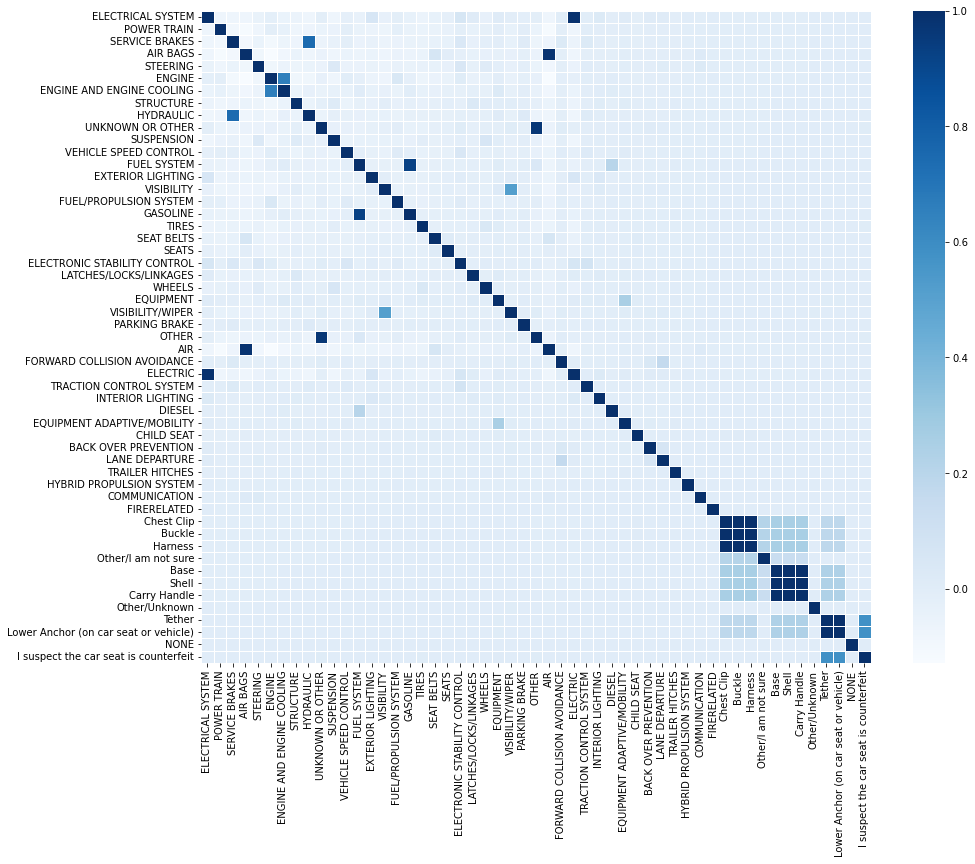

In [285]:
fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(components_corr,fmt="",cmap="Blues",linewidths=0.5, ax=ax)
# Save as png image
fig.savefig('./Outputs/Complaint_components_corr.png', format='png')